In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [2]:
df=pd.read_csv("TB_burden_countries_2023-11-20.csv")
#Mortality and incidence

df2=pd.read_csv("TB_budget_2023-11-21.csv")
#Budget and funding

defs=pd.read_csv("TB_data_dictionary_2023-11-14.csv")
#Definition of WHO codes

In [3]:
defs_dict=dict(zip(defs.variable_name,defs.definition))
#Definitions in dictionary form

In [4]:
df_defined=list(set(df.columns)&set(defs.variable_name))
df2_defined=list(set(df2.columns)&set(defs.variable_name))
#Lists of defined WHO codes for each dataframe

In [5]:
df_dict=dict(zip(df_defined, [defs_dict[x] for x in df_defined]))
df2_dict=dict(zip(df2_defined, [defs_dict[x] for x in df2_defined]))
#Definitions in dictionary for each dataframe
#Some WHO codes are not defined

In [6]:
df["Rate_Untreated"]=1-df.c_cdr/100
#The percentage of untreated cases, as a fraction

In [7]:
df["Num_Untreated"]=df.Rate_Untreated*df.e_inc_num
#The number of cases that went untreated

In [8]:
df["Num_Treated"]=df.e_inc_num-df.Num_Untreated
#The number of cases that were treated
#Assumption: This includes unsuccessful treatment

In [9]:
df.e_mort_num.corr(df.Num_Untreated)
#96% correlation between the estimated number of deaths and the estimated number of people that received treatment.

0.9588538214901489

In [10]:
df_Global=df[["year","Num_Untreated","e_mort_num"]].groupby("year").sum()
#Global data
#Total number of TB-related deaths per year
#Total number of untreated cases per year

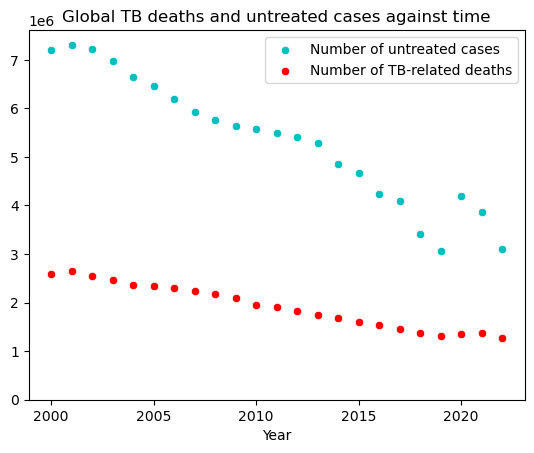

In [11]:
sns.scatterplot(df_Global, x="year", y="Num_Untreated", label="Number of untreated cases", c="c")
sns.scatterplot(df_Global, x="year", y="e_mort_num", label="Number of TB-related deaths", c="r")
plt.ylabel("")
plt.xlabel("Year")
plt.ylim(0)
plt.title("Global TB deaths and untreated cases against time")
plt.show()

In [12]:
rModel_1 = linear_model.LinearRegression()
model_Global=df_Global.dropna()

x=model_Global.Num_Untreated
y=model_Global.e_mort_num
x=x.values.reshape(len(x), 1)
y=y.values.reshape(len(y), 1)
rModel_1.fit(x,y)

LinearRegression()

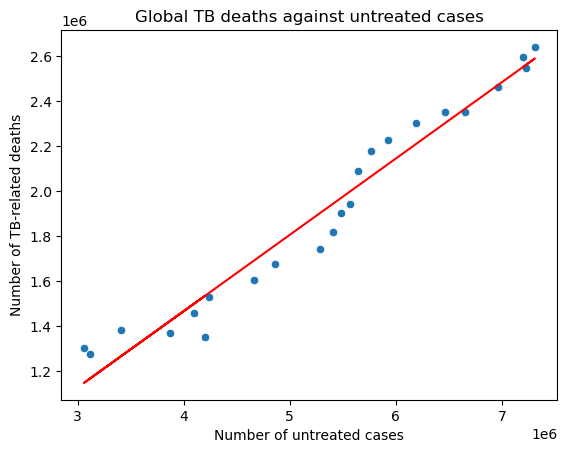

Correlation=0.9787582794782236


In [13]:
sns.scatterplot(df_Global, x="Num_Untreated", y="e_mort_num")
plt.plot(x, rModel_1.predict(x), c="r")
plt.ylabel("Number of TB-related deaths")
plt.xlabel("Number of untreated cases")
plt.title("Global TB deaths against untreated cases")
plt.show()
print("Correlation="+str(df_Global.e_mort_num.corr(df_Global.Num_Untreated)))

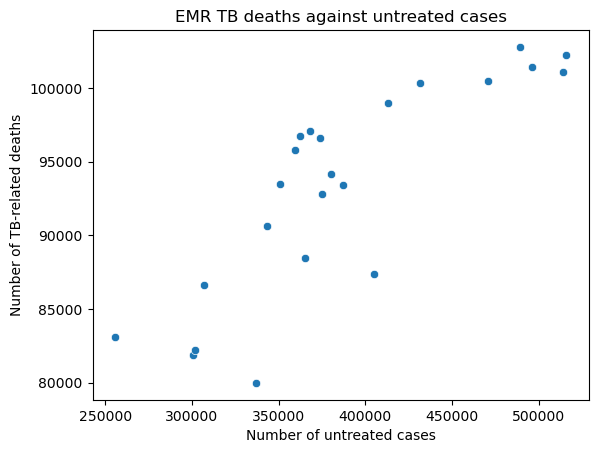

Correlation=0.8387121867165903


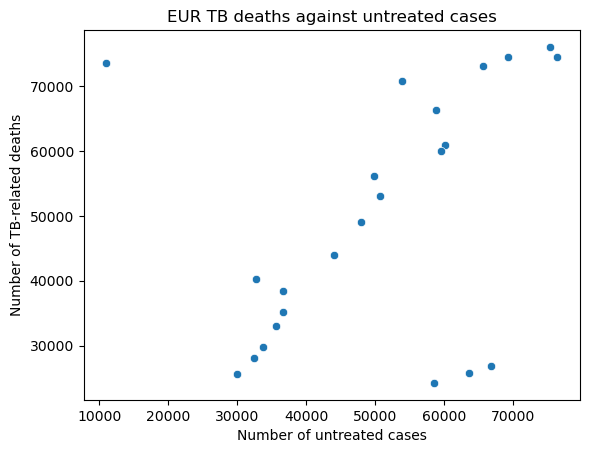

Correlation=0.38701184608455924


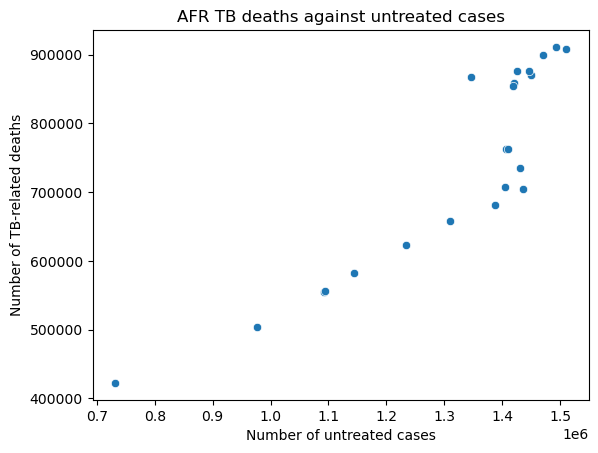

Correlation=0.8940547164935786


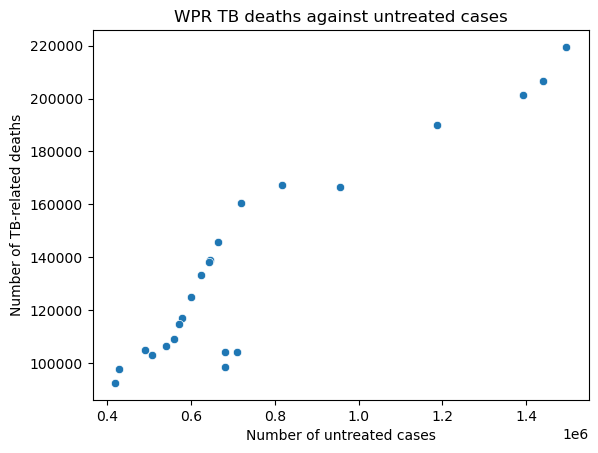

Correlation=0.9236163919395768


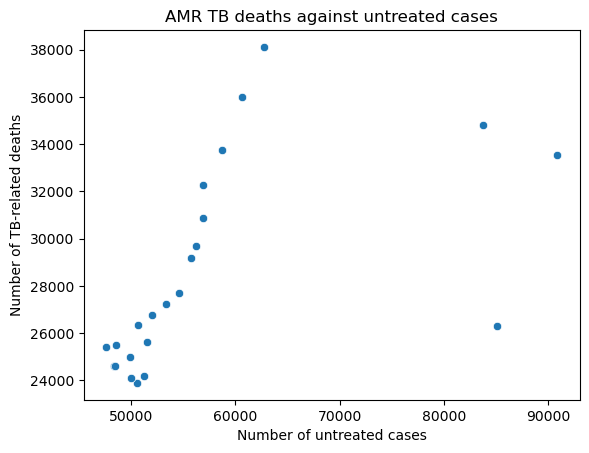

Correlation=0.5560714197721649


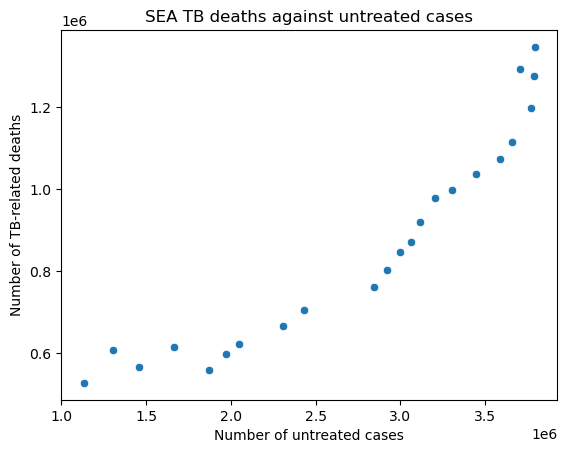

Correlation=0.935665815495867


In [14]:
for region in df.g_whoregion.unique():

    df_Region=df[df.g_whoregion==region][["year","Num_Untreated","e_mort_num"]].groupby("year").sum()
    sns.scatterplot(df_Region, x="Num_Untreated", y="e_mort_num")
    plt.ylabel("Number of TB-related deaths")
    plt.xlabel("Number of untreated cases")
    plt.title(region+" TB deaths against untreated cases")
    plt.show()
    print("Correlation="+str(df_Region.e_mort_num.corr(df_Region.Num_Untreated)))

In [15]:
df_EU=df[df.g_whoregion=="EUR"][["year","Num_Untreated","e_mort_num"]].groupby("year").sum()
#European dataframe to look at the outliers

df_EU["Angle"]=np.arctan(df_EU.Num_Untreated/df_EU.e_mort_num)
#Angle to the x axis for each point

df_EU["Angle_dev"]=abs(df_EU.Angle.mean()-df_EU.Angle)
#Absolute angular distance from mean to value

EU_Outliers=df_EU[df_EU.Angle_dev>df_EU.Angle_dev.quantile(0.85)]
EU_Inliers=df_EU[df_EU.Angle_dev<=df_EU.Angle_dev.quantile(0.85)]

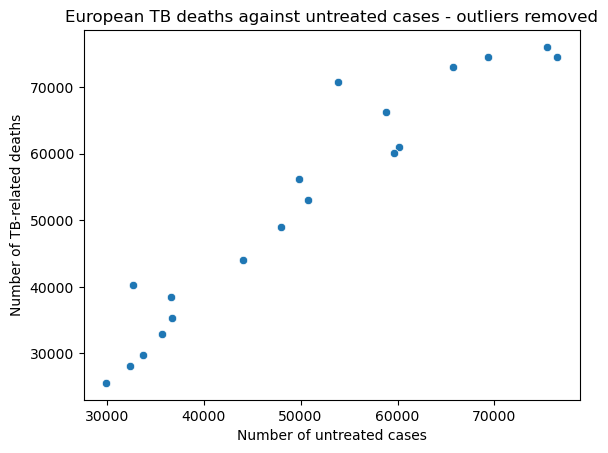

Correlation=0.9571868015590486


In [16]:
sns.scatterplot(EU_Inliers, x="Num_Untreated", y="e_mort_num")
plt.ylabel("Number of TB-related deaths")
plt.xlabel("Number of untreated cases")
plt.title("European TB deaths against untreated cases - outliers removed")
plt.show()
print("Correlation="+str(EU_Inliers.e_mort_num.corr(EU_Inliers.Num_Untreated)))

In [17]:
df_AMR=df[df.g_whoregion=="AMR"][["year","Num_Untreated","e_mort_num"]].groupby("year").sum()
#American dataframe to look at the outliers

df_AMR["Angle"]=np.arctan(df_AMR.Num_Untreated/df_AMR.e_mort_num)
#Angle to the x axis for each point

df_AMR["Angle_dev"]=abs(df_AMR.Angle.mean()-df_AMR.Angle)
#Absolute angular distance from mean to value

AMR_Outliers=df_AMR[df_AMR.Angle_dev>df_AMR.Angle_dev.quantile(0.85)]
AMR_Inliers=df_AMR[df_AMR.Angle_dev<=df_AMR.Angle_dev.quantile(0.85)]

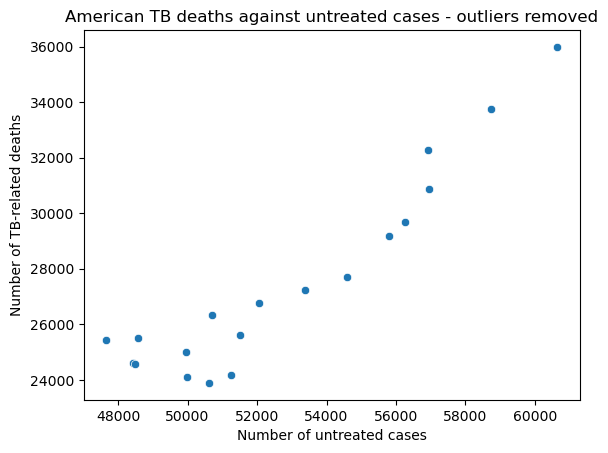

Correlation=0.935245689369028


In [18]:
sns.scatterplot(AMR_Inliers, x="Num_Untreated", y="e_mort_num")
plt.ylabel("Number of TB-related deaths")
plt.xlabel("Number of untreated cases")
plt.title("American TB deaths against untreated cases - outliers removed")
plt.show()
print("Correlation="+str(AMR_Inliers.e_mort_num.corr(AMR_Inliers.Num_Untreated)))

In [19]:
AMR_Outliers.Angle-df_AMR.Angle.mean()

year
2000   -0.080663
2020    0.165002
2021    0.111364
2022    0.071159
Name: Angle, dtype: float64

In [20]:
EU_Outliers.Angle-df_EU.Angle.mean()

year
2003   -0.651699
2020    0.386780
2021    0.389350
2022    0.378453
Name: Angle, dtype: float64

In [21]:
print("""
Both the Americas and Europe have an unusually large number of untreated cases from 2020-2022.
This could be explained by the COVID-19 epidemic interfering with TB treatment.
Possible explanations for the 2000 and 2003 overperformances are less clear.
""")


Both the Americas and Europe have an unusually large number of untreated cases from 2020-2022.
This could be explained by the COVID-19 epidemic interfering with TB treatment.
Possible explanations for the 2000 and 2003 overperformances are less clear.



In [22]:
df2["Funding_Gap"]=df2.budget_tot-df2.cf_tot_sources
#Difference between total funding and total required funding

In [23]:
SharedCols=list(set(df2.columns)&set(df.columns))
SharedCols.remove("iso3")
SharedCols.remove("year")
df_mif=df2.merge(df.drop(columns=SharedCols),how="inner", on=["iso3","year"])
#Mortality, incidence, funding data

In [24]:
rModel_2 = linear_model.LinearRegression()
model_df=df_mif.dropna()

x=model_df[model_df.Funding_Gap!=0].Funding_Gap
y=model_df[model_df.Funding_Gap!=0].Num_Untreated
x=x.values.reshape(len(x), 1)
y=y.values.reshape(len(y), 1)
rModel_2.fit(x,y)

LinearRegression()

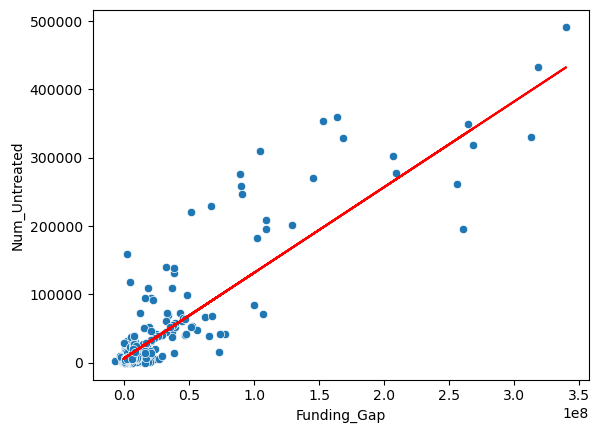

In [25]:
sns.scatterplot(df_mif[df_mif.Funding_Gap!=0], x="Funding_Gap", y="Num_Untreated")
plt.plot(x, rModel_2.predict(x), c="r")
plt.show()

In [26]:
df_mif[df_mif.Funding_Gap!=0].Funding_Gap.corr(df_mif[df_mif.Funding_Gap>0].Num_Untreated)
#For countries with non-zero funding gaps
#This is the correlation between funding gaps and number of untreated people

0.8972325054144291

In [27]:
df_mif[df_mif.Funding_Gap!=0].Funding_Gap.corr(df_mif[df_mif.Funding_Gap!=0].e_mort_num)
#For countries with non-zero funding gaps
#This is the correlation between funding gaps and number of deaths

0.8732162707090273

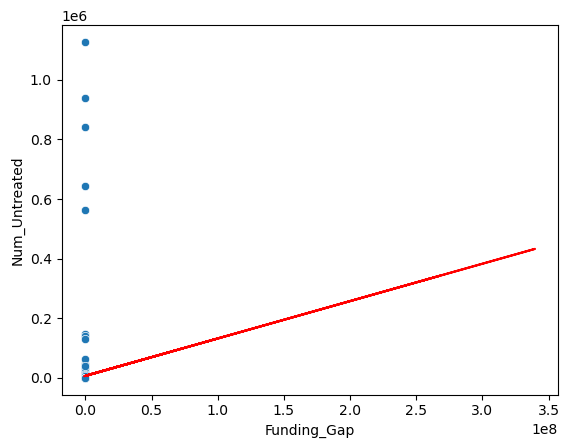

In [28]:
sns.scatterplot(df_mif[df_mif.Funding_Gap==0], x="Funding_Gap", y="Num_Untreated")
plt.plot(x, rModel_2.predict(x), c="r")
plt.show()

In [29]:
print("""
There are instances with a funding gap of 0, where the number of untreated people is far higher than expected.
Assuming a causal link between funding and treatment, there could be several explanation for this.
The budgeted fund could be far below what was actually required - this may occur if the budget was made before a large increase in incidence.
The funds could be sufficient, but not result in treatment, perhaps due to delays or procedural failure.

There are five clear outliers.
""")


There are instances with a funding gap of 0, where the number of untreated people is far higher than expected.
Assuming a causal link between funding and treatment, there could be several explanation for this.
The budgeted fund could be far below what was actually required - this may occur if the budget was made before a large increase in incidence.
The funds could be sufficient, but not result in treatment, perhaps due to delays or procedural failure.

There are five clear outliers.



In [30]:
df_mif[df_mif.Funding_Gap==0].sort_values("Num_Untreated", ascending=False).head(5)

,country,iso2,iso3,iso_numeric,g_whoregion,year,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,...,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi,Rate_Untreated,Num_Untreated,Num_Treated
452,India,IN,IND,356,SEA,2020,2290000.0,30.0,57500.0,800.0,...,13.0,9.0,17.0,117.0,59.0,52.0,68.0,0.41,1127500.0,1622500.0
450,India,IN,IND,356,SEA,2018,2916997.0,45.0,59400.0,1000.0,...,13.0,10.0,17.0,139.0,67.0,60.0,75.0,0.33,940500.0,1909500.0
453,India,IN,IND,356,SEA,2021,1781382.0,33.0,52800.0,450.0,...,13.0,9.0,17.0,140.0,70.0,61.0,81.0,0.30,843000.0,1967000.0
451,India,IN,IND,356,SEA,2019,3000000.0,30.0,71000.0,800.0,...,12.0,9.0,16.0,156.0,77.0,69.0,87.0,0.23,644000.0,2156000.0
454,India,IN,IND,356,SEA,2022,1820019.0,24.0,53055.0,330.0,...,12.0,8.0,17.0,159.0,80.0,69.0,94.0,0.20,564000.0,2256000.0


In [31]:
print("""
The number of untreated cases is unusually large (relative to the funding gap) in India exclusively.
It may be significant that these occur at a funding gap of exactly 0.
""")


The number of untreated cases is unusually large (relative to the funding gap) in India exclusively.
It may be significant that these occur at a funding gap of exactly 0.



In [50]:
df_fin=df_mif[["e_mort_num","Funding_Gap"]][df_mif.country!="India"]
df_fin.dropna(inplace=True)

In [51]:
rModel_3 = linear_model.LinearRegression()

x=df_fin[df_fin.Funding_Gap!=0].Funding_Gap
y=df_fin[df_fin.Funding_Gap!=0].e_mort_num
x=x.values.reshape(len(x), 1)
y=y.values.reshape(len(y), 1)
rModel_3.fit(x,y)

LinearRegression()

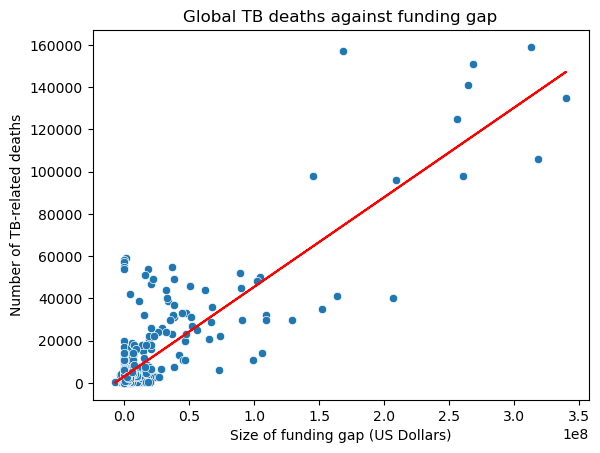

Correlation=0.8491179045608633


In [61]:
sns.scatterplot(df_fin, x="Funding_Gap", y="e_mort_num")
plt.plot(x, rModel_3.predict(x), c="r")
plt.ylabel("Number of TB-related deaths")
plt.xlabel("Size of funding gap (US Dollars)")
plt.title("Global TB deaths against funding gap")
plt.show()
print("Correlation="+str(df_fin.e_mort_num.corr(df_fin.Funding_Gap)))